In [101]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')



In [102]:
#Dataset de aguacates
avocado = pd.read_csv('avocado.csv')

In [103]:
#Encabezados
avocado.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95


In [104]:
#Tamaño del dataset
avocado.shape

(18249, 7)

In [105]:
#get inputs values
X = avocado.iloc[:, 0:6].values
Y = avocado.iloc[0:, 6].values

In [106]:
#transpuesta de Y
Yfinal = np.zeros((18249, 1))
count = 0
for i in Y.transpose():
    Yfinal[count, 0] = i
    count=count+1

In [107]:
#Pruebas
print(X)
print(Yfinal)

[[0.0000000e+00 1.3300000e+00 6.4236620e+04 1.0367400e+03 5.4454850e+04
  4.8160000e+01]
 [1.0000000e+00 1.3500000e+00 5.4876980e+04 6.7428000e+02 4.4638810e+04
  5.8330000e+01]
 [2.0000000e+00 9.3000000e-01 1.1822022e+05 7.9470000e+02 1.0914967e+05
  1.3050000e+02]
 ...
 [9.0000000e+00 1.8700000e+00 1.3766760e+04 1.1919200e+03 2.4527900e+03
  7.2794000e+02]
 [1.0000000e+01 1.9300000e+00 1.6205220e+04 1.5276300e+03 2.9810400e+03
  7.2701000e+02]
 [1.1000000e+01 1.6200000e+00 1.7489580e+04 2.8947700e+03 2.3561300e+03
  2.2453000e+02]]
[[ 8696.87]
 [ 9505.56]
 [ 8145.35]
 ...
 [ 9394.11]
 [10969.54]
 [12014.15]]


In [108]:
#Normalizar X y Y
Xn = X/X.max()
print(Xn)



[[0.00000000e+00 2.12780776e-08 1.02769307e-03 1.65863415e-05
  8.71198892e-04 7.70490391e-07]
 [1.59985546e-08 2.15980487e-08 8.77952362e-04 1.07875054e-05
  7.14156440e-04 9.33195691e-07]
 [3.19971092e-08 1.48786558e-08 1.89135265e-03 1.27140514e-05
  1.74623696e-03 2.08781138e-06]
 ...
 [1.43986992e-07 2.99172971e-08 2.20248262e-04 1.90689972e-05
  3.92410948e-05 1.16459879e-05]
 [1.59985546e-07 3.08772104e-08 2.59260097e-04 2.44398720e-05
  4.76923313e-05 1.16311092e-05]
 [1.75984101e-07 2.59176585e-08 2.79808001e-04 4.63121360e-05
  3.76946745e-05 3.59215547e-06]]


In [109]:
#normalizar Yfinal
yn = Yfinal/100
print(yn)


[[ 86.9687]
 [ 95.0556]
 [ 81.4535]
 ...
 [ 93.9411]
 [109.6954]
 [120.1415]]


In [110]:
#Todas en la misma fila
yn.ravel()


array([ 86.9687,  95.0556,  81.4535, ...,  93.9411, 109.6954, 120.1415])

In [111]:
#red neuronal basica
class RedNeuronal():
    def __init__(self):
        self.inputs = 6
        self.outputs = 1
        self.hidden = 5
        self.W1 = np.random.rand(self.inputs, self.hidden)
        self.W2 = np.random.rand(self.hidden, self.outputs)
    def sigmoide(self, Z):
        return 1 / (1 + np.exp(-Z))
    def feedForward(self, X):
        self.Z2 =  X @ self.W1  #XW1
        self.a2 =  self.sigmoide(self.Z2)   #f(Z2)
        self.Z3 =   self.a2 @ self.W2 #a2W2
        self.yhat =  self.sigmoide(self.Z3)#f(Z3)
        return self.yhat
    def sigmoideDerivada(self, Z):
        return np.exp(-Z)/((1+np.exp(-Z))**2)
    
    def funcionCosto(self, X, y):
        self.yhat = self.feedForward(X)
        Costo = 0.5*sum((y-self.yhat)**2)
        return Costo
    
    def funcionDeCostoDerivada(self, X, y):
        #Predicciones
        self.yhat = self.feedForward(X)
        #delta3 = diferencia de y -yhat * derivadaFuncionActivacion
        self.delta3 = np.multiply( -(y-self.yhat),                                  self.sigmoideDerivada(self.Z3))
        
        #djW2 = producto transpuesta a2 * delta 3
        djW2 = self.a2.T @ self.delta3
        
        #delta2 = delta3 * transpuesta W2 * sigmoideDerivada Z2
        self.delta2 = self.delta3@self.W2.T *self.sigmoideDerivada(self.Z2)
        #djDW1 delta2 * trasnpuesta X
        djW1 = X.T @ self.delta2 
        
        return djW1, djW2
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))
   
    def getGradientes(self, X, y):
        djW1, djW2 = self.funcionDeCostoDerivada(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))


In [112]:
#Costo  y error
rn = RedNeuronal()
error = rn.funcionCosto(Xn, yn)
print(error)

[9.39832317e+11]


In [113]:
#Derivadas



djW1, djW2 = rn.funcionDeCostoDerivada(Xn,yn)

print(djW1)


print(djW2)

[[-6.02206801e-01 -2.83219112e-01 -6.13258327e-02 -2.00924220e-01
  -4.86368751e-01]
 [-2.80399694e-02 -1.31725249e-02 -2.85135261e-03 -9.37384124e-03
  -2.26739703e-02]
 [-3.18847709e+05 -1.53269202e+05 -3.32355461e+04 -1.03646460e+05
  -2.52428495e+05]
 [-1.11456534e+05 -5.35771021e+04 -1.16164189e+04 -3.62379497e+04
  -8.82404775e+04]
 [-1.04749111e+05 -5.03458761e+04 -1.09218313e+04 -3.40177060e+04
  -8.29103620e+04]
 [-8.15177270e+03 -3.91809112e+03 -8.50408055e+02 -2.64304892e+03
  -6.44855590e+03]]
[[-3900942.74106892]
 [-3782913.37014367]
 [-3772017.58825658]
 [-4000382.21084329]
 [-3979104.51391602]]


In [114]:
#Entrenador 
from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.funcionCosto(self.X, self.y))  
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.funcionCosto(X, y)
        grad = self.NN.getGradientes(X,y)        
        return cost, grad
       
    def entrena(self, X, y):
        # variables para funciones callback
        self.X = X
        self.y = y
        
        # lista temporal de costos
        self.Costos = []
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 200, 'disp' : True}
        
        #self.obtenPesosNN, funcion objetivo
        #args=(X, y), input / output data
        # salida, regresa el costo y los gradientes
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS',                                  args=(X, y), options=opciones, callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida



In [115]:
#Entrenamos la red
nn = RedNeuronal()
e = Entrenador(nn)
e.entrena(Xn, yn)


C:\Users\Aldo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in square
C:\Users\Aldo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Aldo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
C:\Users\Aldo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Aldo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Aldo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
C:\Users\Aldo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWar

         Current function value: 939823316785.347656
         Iterations: 29
         Function evaluations: 66
         Gradient evaluations: 54


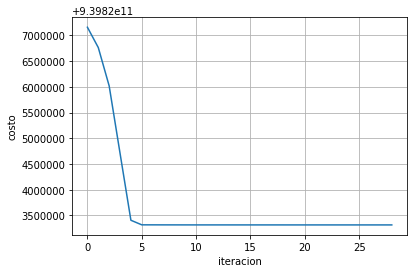

In [116]:
#Gráfica de iteración contra costo
plt.plot(e.Costos)
plt.grid()
plt.ylabel("costo")
plt.xlabel("iteracion")
plt.show()

In [117]:

#Entrenamiento
trainX = np.array(([3,5,8,9,1,2], [5,1,8,1,3,5], [10,2, 10, 2,4,5], [6,1.5, 4,6,9,12]), dtype=float)
trainY = np.array(([1], [0], [0], [0]), dtype=float)

#Pruebas
testX = np.array(([4, 5.5, 4,6,8,1], [4.5,1,12,6,12,6], [9,2.5,3,5,7,1], [6, 2,7,3,4,8]), dtype=float)
testY = np.array(([0], [0], [0], [1]), dtype=float)

#Normalización
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 

testX = testX/np.amax(trainX, axis=0)
testY = testY/100
print(testX)
print(trainX)

[[ 4.   5.5  4.   6.   8.   1. ]
 [ 4.5  1.  12.   6.  12.   6. ]
 [ 9.   2.5  3.   5.   7.   1. ]
 [ 6.   2.   7.   3.   4.   8. ]]
[[0.3        1.         0.8        1.         0.11111111 0.16666667]
 [0.5        0.2        0.8        0.11111111 0.33333333 0.41666667]
 [1.         0.4        1.         0.22222222 0.44444444 0.41666667]
 [0.6        0.3        0.4        0.66666667 1.         1.        ]]


In [118]:


from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.funcionCosto(self.X, self.y))  
        self.CostosTest.append(             self.NN.funcionCosto(self.Xtest, self.ytest))
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.funcionCosto(X, y)
        grad = self.NN.getGradientes(X,y)        
        return cost, grad
       
    def entrena(self, Xtrain, ytrain, Xtest, ytest):
        # variables para funciones callback
        self.X = Xtrain
        self.y = ytrain
        
        self.Xtest = Xtest
        self.ytest = ytest
        
        # lista temporal de costos
        self.Costos = []
        self.CostosTest = []
        
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 200, 'disp' : True}
        
        #self.obtenPesosNN, funcion objetivo
        #args=(X, y), input / output data
        # salida, regresa el costo y los gradientes
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS',                                  args=(Xtrain, ytrain),                                    options=opciones,                                    callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida


Optimization terminated successfully.
         Current function value: 0.000041
         Iterations: 1
         Function evaluations: 4
         Gradient evaluations: 4


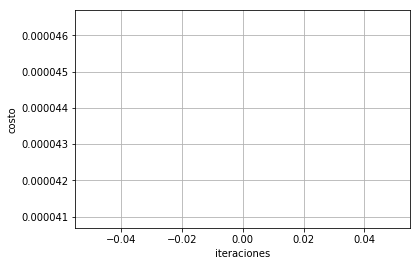

In [119]:
#Entrenamos

nn = RedNeuronal()
e = Entrenador(nn)
e.entrena(trainX, trainY, testX, testY)


plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("costo")
plt.xlabel("iteraciones")
plt.show()

In [120]:

class RedNeuronal():
    def __init__(self, Lambda = 0):
        self.inputs = 6
        self.outputs = 1
        self.hidden = 3
        self.W1 = np.random.rand(self.inputs, self.hidden)
        self.W2 = np.random.rand(self.hidden, self.outputs)
        self.Lambda = Lambda
        
    def sigmoide(self, Z):
        return 1 / (1 + np.exp(-Z))
    def feedForward(self, X):
        self.Z2 =  X @ self.W1  #XW1
        self.a2 =  self.sigmoide(self.Z2)   #f(Z2)
        self.Z3 =   self.a2 @ self.W2 #a2W2
        self.yhat =  self.sigmoide(self.Z3)#f(Z3)
        return self.yhat
    def sigmoideDerivada(self, Z):
        return np.exp(-Z)/((1+np.exp(-Z))**2)
    
    def funcionCosto(self, X, y):
        self.yhat = self.feedForward(X)
        Costo = 0.5*sum((y-self.yhat)**2)/X.shape[0] + (self.Lambda/2)         * (np.sum(self.W1**2) + np.sum(self.W2**2))
        return Costo
    
    def funcionDeCostoDerivada(self, X, y):
        #Predicciones
        self.yhat = self.feedForward(X)
        #delta3 = diferencia de y -yhat * derivadaFuncionActivacion
        self.delta3 = np.multiply( -(y-self.yhat),                                  self.sigmoideDerivada(self.Z3))
        
        #djW2 = producto transpuesta a2 * delta 3
        djW2 = (self.a2.T @ self.delta3) / X.shape[0] + (self.Lambda* self.W2)
        
        #delta2 = delta3 * transpuesta W2 * sigmoideDerivada Z2
        self.delta2 = self.delta3@self.W2.T *self.sigmoideDerivada(self.Z2)
        #djDW1 delta2 * trasnpuesta X
        djW1 = X.T @ self.delta2 / X.shape[0] + (self.Lambda* self.W1) 

        return djW1, djW2
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))
   
    def getGradientes(self, X, y):
        djW1, djW2 = self.funcionDeCostoDerivada(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))



Optimization terminated successfully.
         Current function value: 0.000703
         Iterations: 37
         Function evaluations: 41
         Gradient evaluations: 41


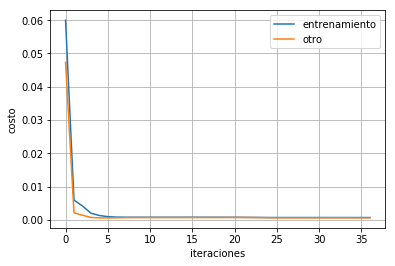

In [121]:
#Con la red entrenada volvemos a comparar

nn = RedNeuronal(Lambda=0.0001)
e = Entrenador(nn)
e.entrena(trainX, trainY, testX, testY)


plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("costo")
plt.xlabel("iteraciones")
plt.legend(['entrenamiento', 'otro'])
plt.show()